### Import Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


### Load Fashion Mnist Data

In [2]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Preview First Image

Image Label:  9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

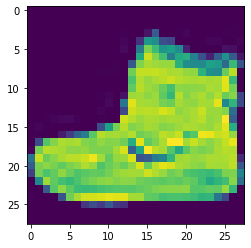

In [3]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print("Image Label: ", training_labels[0])
print(training_images[0])

### Reshape Image and Normalise the pixel values

In [4]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Custom Call Back Class

### Define The Model

In [19]:
model = tf.keras.models.Sequential()

In [20]:
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [23]:
history = model.fit(training_images, training_labels, epochs=15, validation_data=(test_images, test_labels), verbose=2, batch_size=128)

Epoch 1/15
469/469 - 3s - loss: 0.5421 - accuracy: 0.8026 - val_loss: 0.4005 - val_accuracy: 0.8588
Epoch 2/15
469/469 - 3s - loss: 0.3450 - accuracy: 0.8760 - val_loss: 0.3608 - val_accuracy: 0.8655
Epoch 3/15
469/469 - 3s - loss: 0.2971 - accuracy: 0.8918 - val_loss: 0.2981 - val_accuracy: 0.8938
Epoch 4/15
469/469 - 3s - loss: 0.2646 - accuracy: 0.9039 - val_loss: 0.2788 - val_accuracy: 0.8994
Epoch 5/15
469/469 - 3s - loss: 0.2408 - accuracy: 0.9114 - val_loss: 0.2773 - val_accuracy: 0.9000
Epoch 6/15
469/469 - 3s - loss: 0.2201 - accuracy: 0.9196 - val_loss: 0.2626 - val_accuracy: 0.9030
Epoch 7/15
469/469 - 3s - loss: 0.2037 - accuracy: 0.9247 - val_loss: 0.2851 - val_accuracy: 0.8978
Epoch 8/15
469/469 - 3s - loss: 0.1871 - accuracy: 0.9305 - val_loss: 0.2555 - val_accuracy: 0.9074
Epoch 9/15
469/469 - 3s - loss: 0.1739 - accuracy: 0.9352 - val_loss: 0.2455 - val_accuracy: 0.9125
Epoch 10/15
469/469 - 3s - loss: 0.1583 - accuracy: 0.9420 - val_loss: 0.2594 - val_accuracy: 0.9041

In [24]:
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(train_accuracy))

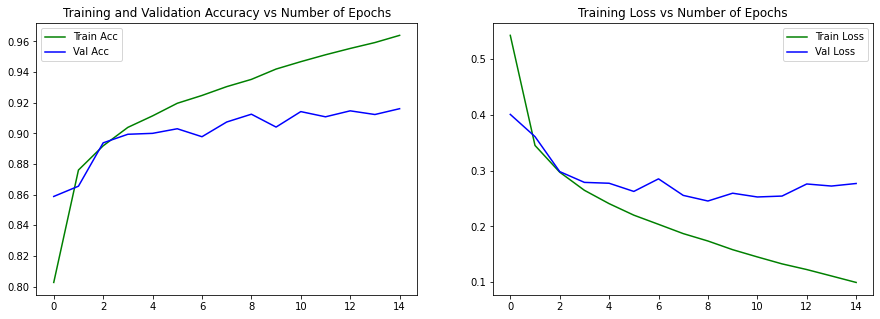

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, "green", label="Train Acc")
plt.plot(epochs, val_accuracy, "blue", label="Val Acc")
plt.title("Training and Validation Accuracy vs Number of Epochs")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, "green", label="Train Loss")
plt.plot(epochs, val_loss, "blue", label="Val Loss")
plt.title("Training Loss vs Number of Epochs")
plt.legend()
plt.show()

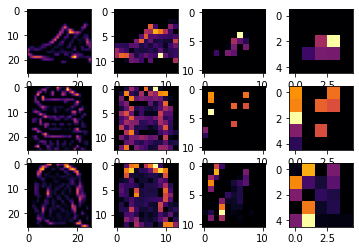

In [26]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)